In [4]:
import sys
sys.path.append("/home/local/jarlehti/projects/gradu")

In [38]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from src.utils.preprocess_dataset import ADULT_COLUMNS_DISCRETIZATION, clean_adult_with_discretization
from pprint import pprint

In [12]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
SYN_DATA_FOLDER = os.path.join(CURRENT_FOLDER, "data", "synt_datasets")
DATASETS_FOLDER = os.path.join(CURRENT_FOLDER, "data", "datasets")

In [13]:
binary3d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary3d.csv'))
binary4d_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'binary4d.csv'))
adult_df = pd.read_csv(os.path.join(DATASETS_FOLDER, 'cleaned_adult_train_data.csv'))

In [14]:
A_vs_B_df = pd.crosstab(binary3d_df["A"], binary3d_df["B"])

In [15]:
A_vs_B_df

B,0,1
A,,
0,24797,25050
1,25031,25122


In [16]:
chi2_stat, p, dof, expected = stats.chi2_contingency(A_vs_B_df)

print(chi2_stat)
print(p)
print(dof)
print(expected)

0.2593850267172252
0.610542964726764
1
[[24837.76316 25009.23684]
 [24990.23684 25162.76316]]


In [17]:
A_vs_C_df = pd.crosstab(binary3d_df["A"], binary3d_df["C"])

In [18]:
A_vs_C_df

C,0,1
A,,
0,24952,24895
1,13385,36768


In [19]:
chi2_stat, p, dof, expected = stats.chi2_contingency(A_vs_C_df)

print(chi2_stat)
print(p)
print(dof)
print(expected)

5774.218088592714
0.0
1
[[19109.84439 30737.15561]
 [19227.15561 30925.84439]]


In [20]:
def count_expected_value(contigency_table):
    total = contigency_table.to_numpy().sum()
    row_sum = np.sum(contigency_table.iloc[0])
    column_sum = np.sum(contigency_table.iloc[:,0])
    expected = (row_sum * column_sum) / total
    return expected

In [21]:
count_expected_value(A_vs_B_df)

24837.76316

In [22]:
def calculate_pairwise_independence_ranking(df, return_p = False):
    columns = df.columns
    column_pairs = list(itertools.combinations(columns, 2))
    ranking = []
    for pair in column_pairs:
        crosstab_df = pd.crosstab(df[pair[0]], df[pair[1]])
        chi2_stat, p, dof, expected = stats.chi2_contingency(crosstab_df)
        if return_p == True:
            ranking.append((pair, chi2_stat, p))
        else:
            ranking.append((pair, chi2_stat))
    
    sorted_ranking = sorted(ranking, key=lambda x: x[1], reverse=False)
    
    return sorted_ranking

In [23]:
calculate_pairwise_independence_ranking(binary3d_df)

[(('A', 'B'), 0.2593850267172252),
 (('B', 'C'), 0.3284871901984492),
 (('A', 'C'), 5774.218088592714)]

In [24]:
calculate_pairwise_independence_ranking(binary4d_df)

[(('A', 'C'), 0.019495122488665556),
 (('B', 'D'), 0.04529012920036457),
 (('A', 'B'), 0.34664135243101496),
 (('B', 'C'), 0.9435563573806336),
 (('A', 'D'), 3370.3994767349027),
 (('C', 'D'), 12616.812878896342)]

In [25]:
adult_df

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,had-capital-gains,had-capital-losses,compensation
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1,0,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0,0,<=50K
30158,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0,0,>50K
30159,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0,0,<=50K
30160,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0,0,<=50K


In [26]:
calculate_pairwise_independence_ranking(adult_df)

[(('race', 'had-capital-losses'), 24.690277099449805),
 (('race', 'had-capital-gains'), 29.70984141243233),
 (('workclass', 'had-capital-losses'), 47.53173465804493),
 (('sex', 'had-capital-losses'), 52.6989349559476),
 (('native-country', 'had-capital-gains'), 62.28370486633404),
 (('native-country', 'had-capital-losses'), 76.8524714139601),
 (('sex', 'had-capital-gains'), 134.36526486773948),
 (('had-capital-gains', 'had-capital-losses'), 136.47514740610606),
 (('capital-gain', 'had-capital-losses'), 137.6188611834951),
 (('capital-loss', 'had-capital-gains'), 137.6188611834951),
 (('capital-gain', 'capital-loss'), 137.61886118349514),
 (('sex', 'native-country'), 143.5104133498522),
 (('workclass', 'had-capital-gains'), 154.46287667772305),
 (('marital-status', 'had-capital-losses'), 181.2030945660446),
 (('hours-per-week', 'had-capital-losses'), 202.3663259371236),
 (('relationship', 'had-capital-losses'), 205.61399741102082),
 (('occupation', 'had-capital-losses'), 215.95984437410

In [27]:
adult_df_reduced = adult_df[['age', 'workclass', 'education-num', 'marital-status', 'race', 'sex']]

In [28]:
calculate_pairwise_independence_ranking(adult_df_reduced)

[(('education-num', 'sex'), 250.19501893764044),
 (('age', 'race'), 361.47619994342926),
 (('workclass', 'race'), 398.33384876147755),
 (('race', 'sex'), 434.63747698869236),
 (('age', 'sex'), 506.71759813555514),
 (('workclass', 'sex'), 634.2371427089755),
 (('education-num', 'race'), 687.5793983318999),
 (('marital-status', 'race'), 845.0064209157549),
 (('workclass', 'marital-status'), 1081.2606703538006),
 (('education-num', 'marital-status'), 1363.9565277890947),
 (('workclass', 'education-num'), 2183.3790380791597),
 (('age', 'workclass'), 2448.790487396327),
 (('marital-status', 'sex'), 6553.390554598343),
 (('age', 'education-num'), 9322.197421890136),
 (('age', 'marital-status'), 14735.599191393907)]

/tmp/ipykernel_123494/1867664373.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  categories = dict(zip(list(adult_df.columns), np.array(ord_enc.categories_).transpose()))


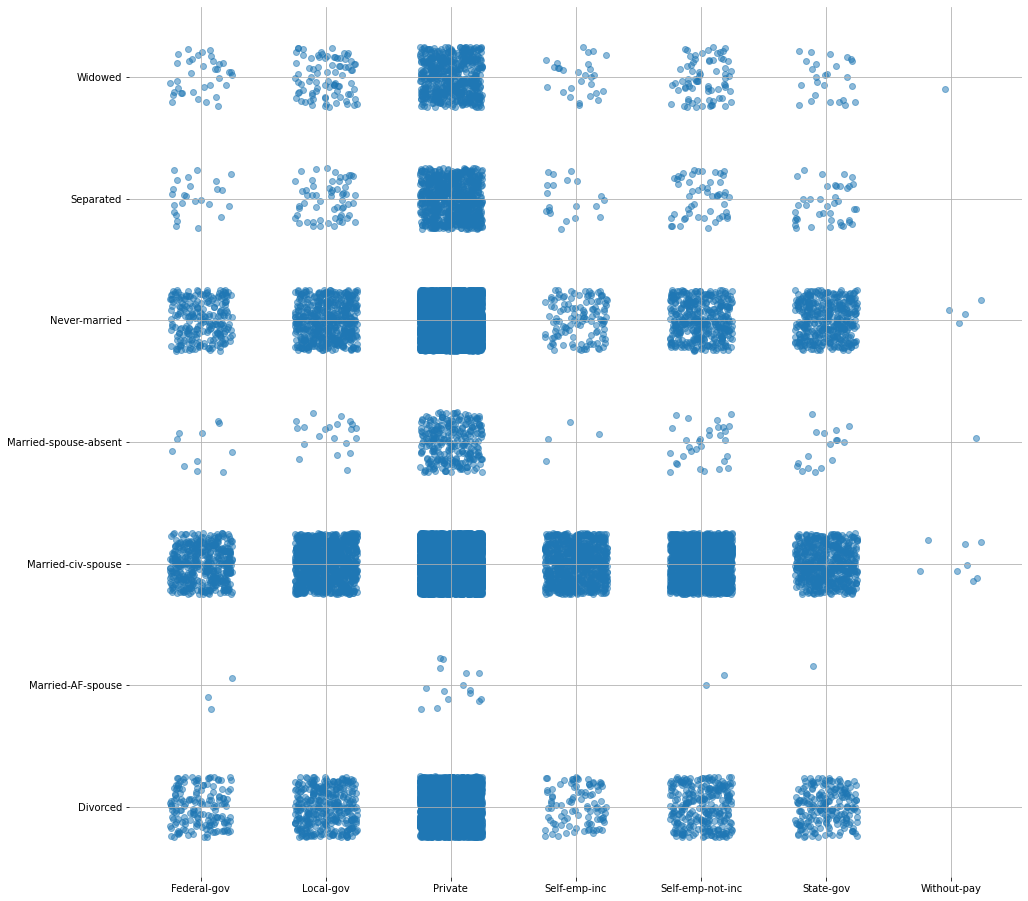

In [29]:
ord_enc = OrdinalEncoder()
enc_df = pd.DataFrame(ord_enc.fit_transform(adult_df), columns=list(adult_df.columns))
categories = dict(zip(list(adult_df.columns), np.array(ord_enc.categories_).transpose()))

xnoise, ynoise = np.random.random(len(adult_df)) / 2 - 0.25, np.random.random(len(adult_df)) / 2 - 0.25

variable_1 = 'workclass'
variable_2 = 'marital-status'

plt.figure(figsize=(16, 16))
plt.scatter(enc_df[variable_1] + xnoise, enc_df[variable_2] + ynoise, alpha=0.5)
plt.xticks(list(range(len(categories[variable_1]))), categories[variable_1])
plt.yticks(list(range(len(categories[variable_2]))), categories[variable_2]) 
plt.grid()
sns.despine(left=True, bottom=True)
plt.show()

In [30]:
six_columns = ["education-num", "relationship", "age", "sex", "hours-per-week", "compensation"]

# Make set of sets
marginal_pairs = list(itertools.combinations(six_columns, 2))

full_set_of_marginals = marginal_pairs

immutable_set_remove = lambda element, list_obj: list(filter(lambda x: set(x) != set(element), list_obj))

test_queries = [immutable_set_remove(pair, full_set_of_marginals) for pair in marginal_pairs]

In [31]:
from pprint import pprint

print(marginal_pairs)
print(len(marginal_pairs))
print(full_set_of_marginals)
print(len(full_set_of_marginals))
pprint(test_queries)
print(len(test_queries[0]))

[('education-num', 'relationship'), ('education-num', 'age'), ('education-num', 'sex'), ('education-num', 'hours-per-week'), ('education-num', 'compensation'), ('relationship', 'age'), ('relationship', 'sex'), ('relationship', 'hours-per-week'), ('relationship', 'compensation'), ('age', 'sex'), ('age', 'hours-per-week'), ('age', 'compensation'), ('sex', 'hours-per-week'), ('sex', 'compensation'), ('hours-per-week', 'compensation')]
15
[('education-num', 'relationship'), ('education-num', 'age'), ('education-num', 'sex'), ('education-num', 'hours-per-week'), ('education-num', 'compensation'), ('relationship', 'age'), ('relationship', 'sex'), ('relationship', 'hours-per-week'), ('relationship', 'compensation'), ('age', 'sex'), ('age', 'hours-per-week'), ('age', 'compensation'), ('sex', 'hours-per-week'), ('sex', 'compensation'), ('hours-per-week', 'compensation')]
15
[[('education-num', 'age'),
  ('education-num', 'sex'),
  ('education-num', 'hours-per-week'),
  ('education-num', 'compen

In [32]:
["+".join(map(str, pair)) for pair in list(set(full_set_of_marginals) - set(test_queries[0]))]

['education-num+relationship']

#### Calculate Chi-Squared test for low discretization Adult data

In [33]:
adult_train_discretized_low = clean_adult_with_discretization(adult_df, bucket_size=10, columns=ADULT_COLUMNS_DISCRETIZATION)

In [34]:
adult_train_discretized_low

,age,workclass,education-num,marital-status,sex,hours-per-week,had-capital-gains,had-capital-losses,compensation
0,30 - 40,State-gov,13,Never-married,Male,40 - 50,1,0,<=50K
1,50 - 60,Self-emp-not-inc,13,Married-civ-spouse,Male,10 - 20,0,0,<=50K
2,30 - 40,Private,9,Divorced,Male,40 - 50,0,0,<=50K
3,50 - 60,Private,7,Married-civ-spouse,Male,40 - 50,0,0,<=50K
4,20 - 30,Private,13,Married-civ-spouse,Female,40 - 50,0,0,<=50K
...,...,...,...,...,...,...,...,...,...
30157,20 - 30,Private,12,Married-civ-spouse,Female,30 - 40,0,0,<=50K
30158,40 - 50,Private,9,Married-civ-spouse,Male,40 - 50,0,0,>50K
30159,50 - 60,Private,9,Widowed,Female,40 - 50,0,0,<=50K
30160,20 - 30,Private,9,Never-married,Male,20 - 30,0,0,<=50K


In [39]:
independence_pairs = calculate_pairwise_independence_ranking(adult_train_discretized_low)
pprint(independence_pairs)

[(('workclass', 'had-capital-losses'), 47.53173465804493),
 (('sex', 'had-capital-losses'), 52.6989349559476),
 (('hours-per-week', 'had-capital-losses'), 89.9234876623279),
 (('sex', 'had-capital-gains'), 134.36526486773948),
 (('had-capital-gains', 'had-capital-losses'), 136.47514740610606),
 (('age', 'had-capital-losses'), 139.47342018830074),
 (('workclass', 'had-capital-gains'), 154.46287667772305),
 (('marital-status', 'had-capital-losses'), 181.2030945660446),
 (('education-num', 'sex'), 250.19501893764044),
 (('education-num', 'had-capital-losses'), 260.38988398728196),
 (('hours-per-week', 'had-capital-gains'), 271.0644611952295),
 (('age', 'sex'), 385.5679948147881),
 (('age', 'had-capital-gains'), 422.27361279948946),
 (('marital-status', 'had-capital-gains'), 499.4325169221191),
 (('had-capital-losses', 'compensation'), 571.9808203656755),
 (('education-num', 'had-capital-gains'), 602.9520706944656),
 (('workclass', 'sex'), 634.2371427089755),
 (('workclass', 'compensation'

In [42]:
# Sorted weights from MST
sorted_weights = [(('sex', 'had-capital-losses'), 719.0234156448024), (('had-capital-gains', 'had-capital-losses'), 945.1309676129038), (('sex', 'had-capital-gains'), 1099.6234358413872), (('education-num', 'had-capital-losses'), 1329.115900680478), (('workclass', 'had-capital-gains'), 1532.7020131138086), (('education-num', 'had-capital-gains'), 1563.4331200343872), (('marital-status', 'had-capital-losses'), 1683.9807791366065), (('age', 'had-capital-losses'), 1689.7683807171902), (('had-capital-losses', 'compensation'), 1827.851906027135), (('education-num', 'sex'), 2010.6261627702709), (('age', 'had-capital-gains'), 2194.5361769806877), (('hours-per-week', 'had-capital-losses'), 2231.2562925426173), (('hours-per-week', 'had-capital-gains'), 2232.3987749814305), (('workclass', 'had-capital-losses'), 2268.9052394631926), (('marital-status', 'had-capital-gains'), 2567.8163834557117), (('workclass', 'sex'), 2769.217465176452), (('workclass', 'compensation'), 3232.123747999659), (('age', 'sex'), 3278.429760847503), (('had-capital-gains', 'compensation'), 3469.373229367717), (('workclass', 'education-num'), 3729.9025728645333), (('education-num', 'marital-status'), 3929.9744988833754), (('education-num', 'hours-per-week'), 4275.551120565958), (('workclass', 'marital-status'), 4615.476723901443), (('age', 'workclass'), 4667.841169322241), (('hours-per-week', 'compensation'), 4818.051542301926), (('age', 'education-num'), 5089.974649782284), (('sex', 'hours-per-week'), 5160.407069939547), (('workclass', 'hours-per-week'), 5216.491909207299), (('sex', 'compensation'), 5259.834689424262), (('education-num', 'compensation'), 5701.846163347841), (('age', 'hours-per-week'), 6012.8957874116395), (('marital-status', 'hours-per-week'), 6357.2576256351695), (('age', 'compensation'), 7014.755145953612), (('marital-status', 'compensation'), 11456.437299518377), (('marital-status', 'sex'), 12496.227193676124), (('age', 'marital-status'), 15078.87332664806)]
pprint(sorted_weights)

[(('sex', 'had-capital-losses'), 719.0234156448024),
 (('had-capital-gains', 'had-capital-losses'), 945.1309676129038),
 (('sex', 'had-capital-gains'), 1099.6234358413872),
 (('education-num', 'had-capital-losses'), 1329.115900680478),
 (('workclass', 'had-capital-gains'), 1532.7020131138086),
 (('education-num', 'had-capital-gains'), 1563.4331200343872),
 (('marital-status', 'had-capital-losses'), 1683.9807791366065),
 (('age', 'had-capital-losses'), 1689.7683807171902),
 (('had-capital-losses', 'compensation'), 1827.851906027135),
 (('education-num', 'sex'), 2010.6261627702709),
 (('age', 'had-capital-gains'), 2194.5361769806877),
 (('hours-per-week', 'had-capital-losses'), 2231.2562925426173),
 (('hours-per-week', 'had-capital-gains'), 2232.3987749814305),
 (('workclass', 'had-capital-losses'), 2268.9052394631926),
 (('marital-status', 'had-capital-gains'), 2567.8163834557117),
 (('workclass', 'sex'), 2769.217465176452),
 (('workclass', 'compensation'), 3232.123747999659),
 (('age',

In [43]:
for a, b in list(zip(independence_pairs, sorted_weights)):
    if set(a[0]) == set(b[0]):
        print("Same ranking!")
        print(a)
        print(b)

Same ranking!
(('marital-status', 'compensation'), 6061.747962669037)
(('marital-status', 'compensation'), 11456.437299518377)
Same ranking!
(('marital-status', 'sex'), 6553.390554598343)
(('marital-status', 'sex'), 12496.227193676124)
Same ranking!
(('age', 'marital-status'), 13009.087524310533)
(('age', 'marital-status'), 15078.87332664806)


In [48]:
ordinal_distances = []

for i, pair_a in enumerate(independence_pairs):
    for j, pair_b in enumerate(sorted_weights):
        if set(pair_a[0]) == set(pair_b[0]):
            ordinal_distances.append((abs(i - j), abs(pair_a[1] - pair_b[1]) / max(pair_a[1], pair_b[1])))
            
            
print(ordinal_distances)

[(13, 0.979050806604294), (1, 0.9267076234107223), (9, 0.9596982704484137), (1, 0.8778079290708017), (3, 0.8556018667436129), (2, 0.9174600366654371), (2, 0.8992218478503078), (1, 0.8923959840806798), (1, 0.8755636310864879), (6, 0.8040879024515709), (2, 0.8785770426712923), (6, 0.8823924796500398), (2, 0.8075795618095178), (1, 0.8055030257848913), (6, 0.68707485629463), (10, 0.6143409890912354), (1, 0.7709688203672503), (1, 0.7511984100850027), (4, 0.7657315300162937), (1, 0.6529350182357071), (8, 0.7309256872489388), (2, 0.6260282659283086), (2, 0.578793794444297), (4, 0.5970312678753519), (2, 0.5880902812397995), (7, 0.385254553227749), (7, 0.41462839968971543), (6, 0.4783519888429468), (3, 0.5731714920162387), (3, 0.5924243469031466), (1, 0.2861291754019349), (6, 0.04089708253586203), (2, 0.02560364462982813), (0, 0.4708871698775089), (0, 0.47557046994834007), (0, 0.1372639558341344)]
